<a href="https://colab.research.google.com/github/solankybasant/demo/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/drive/MyDrive/Colab Notebooks/data/Asg6.zip')

In [ ]:
# Importing libraries

import numpy as np
from keras.preprocessing import image
import cv2 as cv
from google.colab.patches import cv2_imshow
from pathlib import Path
import os
from skimage import feature
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
tensorflow.compat.v1.disable_eager_execution()
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import seaborn as sns
import PIL
from tensorflow import keras
# import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

In [ ]:
def load(container_path): # to load images files
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() ]
    categories = [fo.name for fo in folders]
    cat = []
    for i in folders:
      data = np.load(i)
      cat.append(data)
    print(categories)
    print(folders)

    return folders, categories, cat

In [ ]:
folders, categories, cat = load('/content/Asg6')

['full_numpy_bitmap_bicycle.npy', 'full_numpy_bitmap_bus.npy', 'full_numpy_bitmap_aircraft carrier.npy', 'full_numpy_bitmap_truck.npy', 'full_numpy_bitmap_car.npy']
[PosixPath('/content/Asg6/full_numpy_bitmap_bicycle.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_bus.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_aircraft carrier.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_truck.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_car.npy')]


In [ ]:
x = []
for i in categories:
  i = i.split("_")
  x.append(i[3].rstrip(".npy"))

categories = x
categories

['bus', 'aircraft carrier', 'bicycle', 'car', 'truck']

In [ ]:
cat = np.array(cat)
cat[0].shape

(166208, 784)

In [ ]:
A = cat[2][0]
B = np.reshape(A, (-1, 28))
B.shape

(28, 28)

In [ ]:
cv2_imshow(B)

In [ ]:
data = []
for a in cat:
  sub_data = []
  for b in a:
    b = np.reshape(b, (-1, 28))
    sub_data.append(b)
  data.append(np.array(sub_data))

data = np.array(data)

In [ ]:
for j,k in enumerate(data):
  print(categories[j],"- ",len(k),"images and dim 28X28")

bus -  166208 images and dim 28X28
aircraft carrier -  116504 images and dim 28X28
bicycle -  126527 images and dim 28X28
car -  182764 images and dim 28X28
truck -  131354 images and dim 28X28


In [ ]:
train = [x for i in data for x in i]
label = []
for i,j in enumerate(data):
  l = np.zeros(len(j)) + i
  label.extend(l)

train = np.array(train)
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=42)

In [ ]:
class Part1:
  
  def __init__(self, loc):
    self.folders, self.categories, self.cat = load(loc)
    self.x = []
    for i in self.categories:
      i = i.split("_")
      self.x.append(i[3].rstrip(".npy"))
    self.categories = self.x

    self.data = []
    for a in self.cat:
      sub_data = []
      for b in a:
        b = np.reshape(b, (-1, 28))
        sub_data.append(b)
      self.data.append(np.array(sub_data))

    self.data = np.array(self.data)
    for j,k in enumerate(self.data):
      print(self.categories[j],"- ",len(k),"images and dim 28X28")

    self.train = [x for i in self.data for x in i]
    self.label = []
    for i,j in enumerate(self.data):
      l = np.zeros(len(j)) + i
      self.label.extend(l)
    
    self.train = np.array(self.train)
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.train, self.label, test_size=0.33, random_state=42)

In [ ]:
p1 = Part1("/content/Asg6")

['full_numpy_bitmap_bicycle.npy', 'full_numpy_bitmap_bus.npy', 'full_numpy_bitmap_aircraft carrier.npy', 'full_numpy_bitmap_truck.npy', 'full_numpy_bitmap_car.npy']
[PosixPath('/content/Asg6/full_numpy_bitmap_bicycle.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_bus.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_aircraft carrier.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_truck.npy'), PosixPath('/content/Asg6/full_numpy_bitmap_car.npy')]
bicycle -  126527 images and dim 28X28
bus -  166208 images and dim 28X28
aircraft carrier -  116504 images and dim 28X28
truck -  131354 images and dim 28X28
car -  182764 images and dim 28X28


In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 5

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="elu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="elu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="elu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="elu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="elu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="elu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_5 (Dense)             (None, 3136)              18816     
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 28, 28, 1)        289 

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
# (x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([p1.x_train, p1.x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=3, batch_size=1024)

ValueError: ignored

In [ ]:
encoder.predict(np.array([p1.data[4][600]]))

AttributeError: ignored

In [ ]:
bus = encoder.predict(np.array([p1.data[0][600]]))[2]
car = encoder.predict(np.array([p1.data[4][600]]))[2]

out = bus*0.2 + 0.8*car
img = 255*decoder.predict(out)

1/1 [==============================] - 0s 135ms/step


In [ ]:
cv2_imshow(p1.data[0][600])

In [ ]:
cv2_imshow(img.reshape(28,28))

In [ ]:
def plot_latent_space(vae, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

# plot_latent_space(vae)

In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

15146/15146 [==============================] - 25s 2ms/step


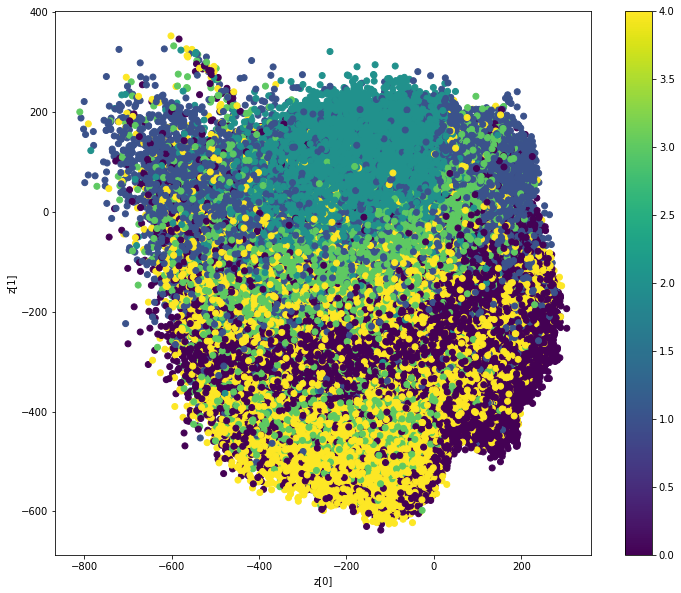

In [ ]:
# (x_train, y_train), _ = keras.datasets.mnist.load_data()
# x_train = np.expand_dims(p1.x_train, -1).astype("float32") / 255
plot_label_clusters(vae, p1.x_train, p1.y_train)

22605/22605 [==============================] - 37s 2ms/step


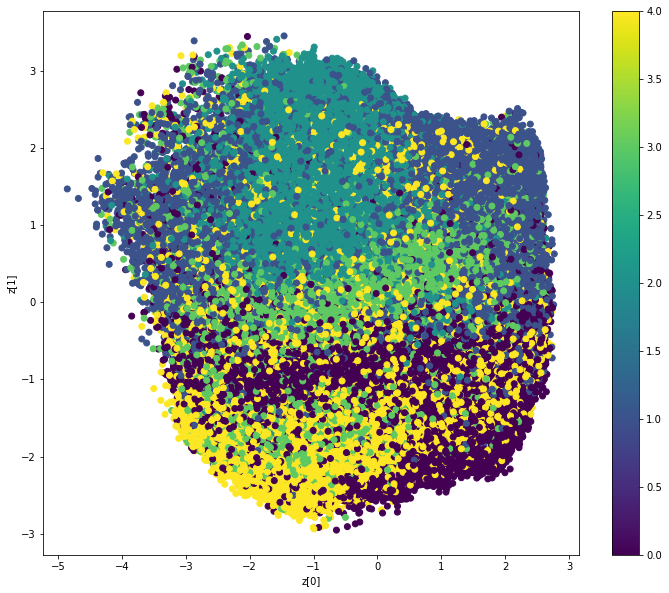

In [ ]:
mnist_lab = np.concatenate([p1.y_train, p1.y_test], axis=0)
plot_label_clusters(vae, mnist_digits, mnist_lab)

7460/7460 [==============================] - 12s 2ms/step


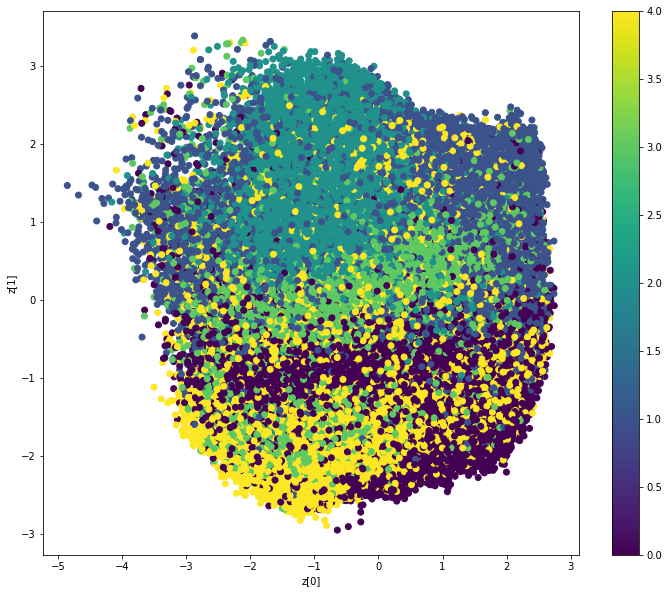

In [ ]:
x_test = np.expand_dims(p1.x_test, -1).astype("float32") / 255
plot_label_clusters(vae, x_test, p1.y_test)

In [ ]:
p1.label = (np.array(p1.label))

In [ ]:
p1.categories

['bus', 'aircraft carrier', 'bicycle', 'car', 'truck']

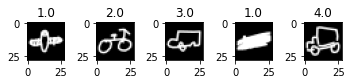

In [ ]:
for j in range(5):
    i = np.random.randint(0, 700000)
    plt.subplot(550 + 1 + j)
    plt.imshow(p1.train[i], cmap='gray')
    # print(p1.label[i], i)
    plt.title(p1.label[i])
plt.show()

In [ ]:
p1.x_train.shape, p1.x_test.shape

((484649, 28, 28), (238708, 28, 28))

In [ ]:
train_data = trainX.astype('float32')/255
test_data = testX.astype('float32')/255
train_data = np.reshape(train_data, (60000, 28, 28, 1))
test_data = np.reshape(test_data, (10000, 28, 28, 1))
print (train_data.shape, test_data.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
input_data = tensorflow.keras.layers.Input(shape=(28, 28, 1))
encoder = tensorflow.keras.layers.Conv2D(64, (5,5), activation='relu')(input_data)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
encoder = tensorflow.keras.layers.Conv2D(64, (3,3), activation='relu')(encoder)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
encoder = tensorflow.keras.layers.Conv2D(32, (3,3), activation='relu')(encoder)
encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
encoder = tensorflow.keras.layers.Flatten()(encoder)
encoder = tensorflow.keras.layers.Dense(16)(encoder)

In [ ]:
def sample_latent_features(distribution):
    distribution_mean, distribution_variance = distribution
    batch_size = tensorflow.shape(distribution_variance)[0]
    random = tensorflow.keras.backend.random_normal(shape=(batch_size, tensorflow.shape(distribution_variance)[1]))
    return distribution_mean + tensorflow.exp(0.5 * distribution_variance) * random
 
distribution_mean = tensorflow.keras.layers.Dense(2, name='mean')(encoder)
distribution_variance = tensorflow.keras.layers.Dense(2, name='log_variance')(encoder)
latent_encoding = tensorflow.keras.layers.Lambda(sample_latent_features)([distribution_mean, distribution_variance])

In [ ]:
encoder_model = tensorflow.keras.Model(input_data, latent_encoding)
encoder_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 24, 24, 64)   1664        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 12, 12, 64)  0           ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 10, 10, 64)   36928       ['max_pooling2d_3[0][0]']        
                                                                                            

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(2))
decoder = tensorflow.keras.layers.Dense(64)(decoder_input)
decoder = tensorflow.keras.layers.Reshape((1, 1, 64))(decoder)
decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
 
decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
 
decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
 
decoder_output = tensorflow.keras.layers.Conv2DTranspose(1, (5,5), activation='relu')(decoder)

In [ ]:
decoder_model = tensorflow.keras.Model(decoder_input, decoder_output)
decoder_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                192       
                                                                 
 reshape_1 (Reshape)         (None, 1, 1, 64)          0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 3, 3, 64)         36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 5, 5, 64)         36928     
 ranspose)                                                       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 10, 10, 64)       0   

In [ ]:
encoded = encoder_model(input_data)
decoded = decoder_model(encoded)
autoencoder = tensorflow.keras.models.Model(input_data, decoded)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model_3 (Functional)        (None, 2)                 57652     
                                                                 
 model_4 (Functional)        (None, 28, 28, 1)         112577    
                                                                 
Total params: 170,229
Trainable params: 170,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_loss(distribution_mean, distribution_variance):
    
    def get_reconstruction_loss(y_true, y_pred):
        reconstruction_loss = tensorflow.keras.losses.mse(y_true, y_pred)
        reconstruction_loss_batch = tensorflow.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch*28*28
    
    def get_kl_loss(distribution_mean, distribution_variance):
        kl_loss = 1 + distribution_variance - tensorflow.square(distribution_mean) - tensorflow.exp(distribution_variance)
        kl_loss_batch = tensorflow.reduce_mean(kl_loss)
        return kl_loss_batch*(-0.5)
    
    def total_loss(y_true, y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true, y_pred)
        kl_loss_batch = get_kl_loss(distribution_mean, distribution_variance)
        return reconstruction_loss_batch + kl_loss_batch
    
    return total_loss

In [ ]:
autoencoder.compile(loss=get_loss(distribution_mean, distribution_variance), optimizer='adam')

In [ ]:
autoencoder.fit(train_data, train_data, epochs=20, batch_size=64, validation_data=(test_data, test_data))

ValueError: ignored

In [ ]:
from tensorflow.keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()